In [54]:
import nltk # Imports the library
nltk.download() #Download the necessary datasets

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
import string

In [10]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [11]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
print(len(messages))

5574


In [13]:
for index,message in enumerate(messages[:10]): #because see functionality of enumerate
    print(index,message)
    

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [14]:
# let's start to create data frame from spam sms data.

In [15]:
import pandas as pd

In [16]:
sms=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['lables','message'])

In [17]:
sms.head()

,lables,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lables   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [19]:
sms.describe()

,lables,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
sms.groupby(by='lables').describe()

message                                                               
         count unique                                                top freq
lables                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [21]:
sms['length']=sms['message'].apply(len)
sms

,lables,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [22]:
sms.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [23]:
sms[sms['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<Axes: ylabel='Frequency'>

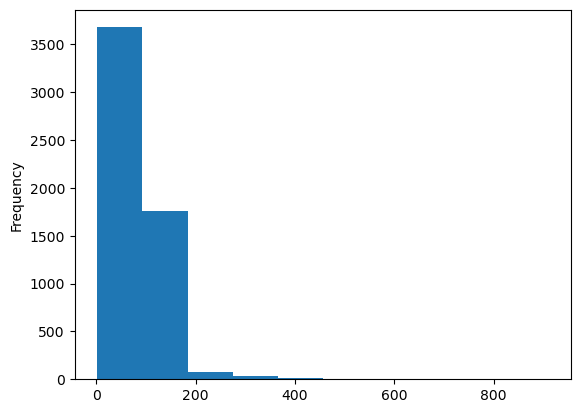

In [24]:
sms['length'].plot(x='length',kind='hist')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='length', ylabel='Count'>

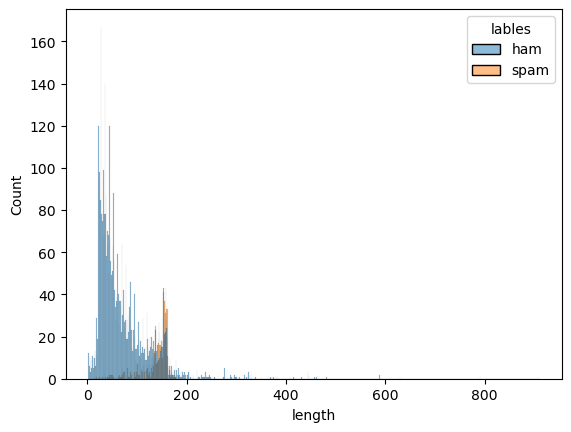

In [26]:
sns.histplot(data=sms,x='length',hue='lables',bins=800)

<Axes: ylabel='Frequency'>

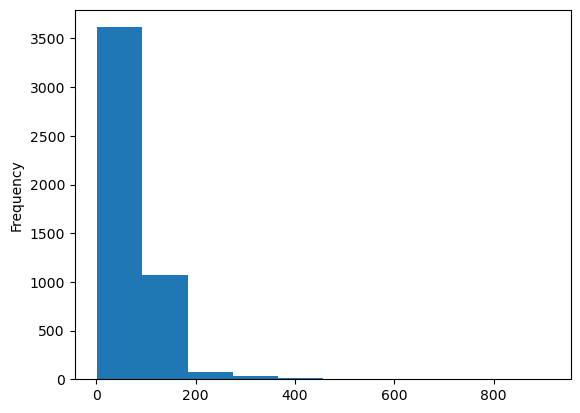

In [27]:
sms[sms['lables']=='ham']['length'].plot(x='length',kind='hist')

<Axes: ylabel='Frequency'>

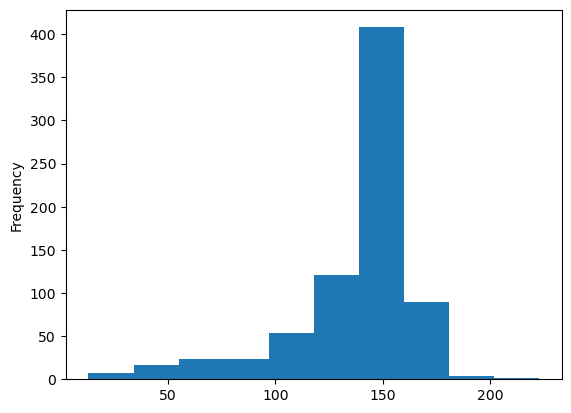

In [28]:
sms[sms['lables']=='spam']['length'].plot(x='length',kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

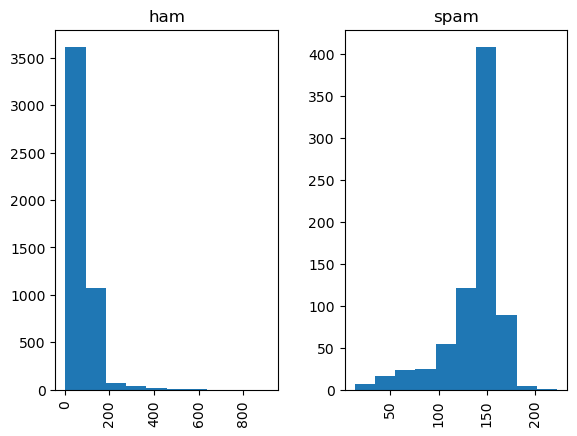

In [29]:
sms.hist(column='length',by='lables')

In [30]:
#So we conclude that we can filter spam and ham messages by the base of length . most of spam messages have 150 char length.

In [31]:
ch='hello! my dear dost.'
sh=[x for x in ch if x not in string.punctuation]

In [32]:
sh

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'm',
 'y',
 ' ',
 'd',
 'e',
 'a',
 'r',
 ' ',
 'd',
 'o',
 's',
 't']

In [33]:
''.join(sh)

'hello my dear dost'

In [34]:
import nltk

In [35]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [48]:
from nltk.corpus import stopwords

In [68]:
def text_processing(msg):
    nonpun=[char for char in msg if char not in string.punctuation]
    nonpun=''.join(nonpun)
   # print(nonpun)
    return [word for word in nonpun.split() if word.lower() not in stopwords.words('english')]

In [140]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(sms['message'], sms['lables'], test_size=0.30, random_state=101)

In [42]:
sms['message'].iloc[3]

'U dun say so early hor... U c already then say...'

In [74]:
test_sms=text_processing(sms['message'].iloc[3])
print(test_sms)

['U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say']


In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
test_vector=CountVectorizer(analyzer=text_processing).fit(sms['message'])
print(test_vector.transform(test_sms))

  (0, 4068)	1
  (1, 6204)	1
  (2, 9554)	1
  (3, 6222)	1
  (4, 7186)	1
  (5, 4068)	1
  (6, 5261)	1
  (7, 4629)	1
  (8, 9554)	1


In [94]:
print(len(test_vector.vocabulary_))

11425


In [96]:
filter_sms=test_vector.transform(sms['message'])

In [98]:
print(filter_sms.shape)

(5572, 11425)


In [102]:
print(filter_sms.nnz)
print(5572*11425)

50548
63660100


In [106]:
sparcity=100*filter_sms.nnz/(filter_sms.shape[0]*filter_sms.shape[1])
print(sparcity)

0.07940295412668218


In [108]:
# let's start to calculate term frequency ,and inverse document frequency 

In [110]:
from sklearn.feature_extraction.text import TfidfTransformer

In [118]:
transformer=TfidfTransformer().fit(filter_sms)

In [122]:
print(transformer.transform(test_vector.transform(test_sms)))

  (0, 4068)	1.0
  (1, 6204)	1.0
  (2, 9554)	1.0
  (3, 6222)	1.0
  (4, 7186)	1.0
  (5, 4068)	1.0
  (6, 5261)	1.0
  (7, 4629)	1.0
  (8, 9554)	1.0


In [124]:
input_data=transformer.transform(filter_sms)

In [126]:
print(input_data.shape)

(5572, 11425)


In [128]:
#ANOTHER WAY TO PREPROCESS DATA BY CREATING PIPELINE IN IT.

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [136]:
pipeline=Pipeline([('bow',CountVectorizer(analyzer=text_processing)),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])

In [144]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x000002039C665BC0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [148]:
y_pred=pipeline.predict(X_test)

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

In [156]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1475    0]
 [  68  129]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672

